# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

In [23]:
# Set up Splinter
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [24]:
# Visited the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Created a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extracted all rows of data
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
mars_temp = df[0]
mars_temp

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [32]:
# Find the table
table = soup.find("table", class_="table")

# Created an empty list to store data
data_list = []

# Created a loop to scrape the data and add it to the data_list
if table:
    rows = table.find_all("tr")
    # retreived the header for each column in the table
    headers = [th.get_text(strip=True) for th in rows[0].find_all("th")]
    
    # Retrieved the remaining data in the table
    for row in rows[1:]:
        cells = [td.get_text(strip=True) for td in row.find_all("td")]
        if cells:  
            data_list.append(dict(zip(headers, cells))) # Append the data_list

# Commented out the output results to make it easier to view in github
# Printed the data
# for row in data_list:
#     print(row)

In [7]:
# Converted the data into a DataFrame
Mars_Temperature = pd.DataFrame(data_list)


In [8]:
# Confirmed that the DataFrame was successfully created
Mars_Temperature

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examined data type of each column
print(Mars_Temperature.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Changed data types for data analysis
Mars_Temperature['terrestrial_date'] = pd.to_datetime(Mars_Temperature['terrestrial_date'])
Mars_Temperature['sol'] = Mars_Temperature['sol'].astype(int)
Mars_Temperature['ls'] = Mars_Temperature['ls'].astype(int)
Mars_Temperature['month'] = Mars_Temperature['month'].astype(int)
Mars_Temperature['min_temp'] = Mars_Temperature['min_temp'].astype(float)
Mars_Temperature['pressure'] = Mars_Temperature['pressure'].astype(float)

In [11]:
# Confirmed type changes were successful by re-examining the data types
print(Mars_Temperature.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [31]:
# 1. How many months are there on Mars?
no_months = Mars_Temperature['month'].max()
print(f"There are {no_months} months on Mars")
print(no_months)

There are 12 months on Mars
12


In [30]:
# 2. How many sols (Martian days) worth of data are there?
no_sols = Mars_Temperature['sol'].count()
print(f"There are {no_sols} sols worth of data in this data set")
print(no_sols)

There are 1867 sols worth of data in this data set
1867


In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp = Mars_Temperature.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

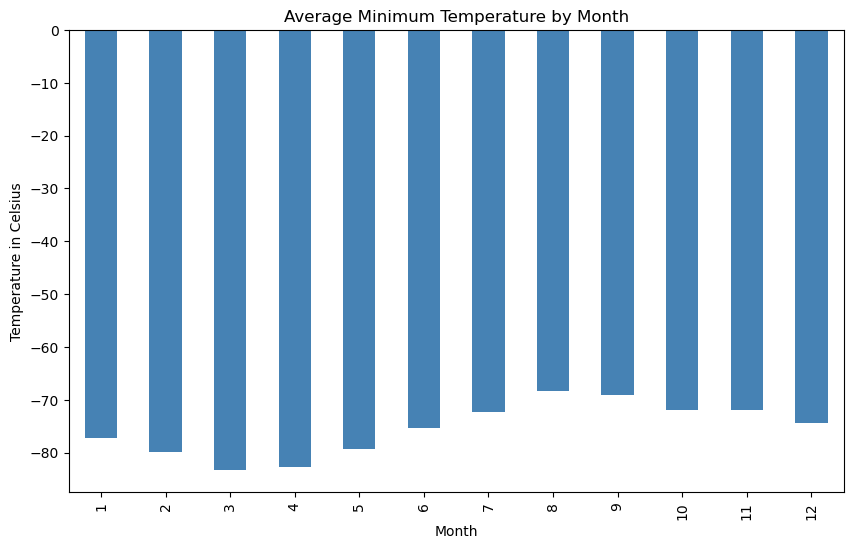

In [15]:
# Created a bar chart
plt.figure(figsize=(10, 6))
avg_min_temp.plot(kind='bar', color='steelblue')

# Formatted the bar chart to include labels and title
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Displayed the chart
plt.show()

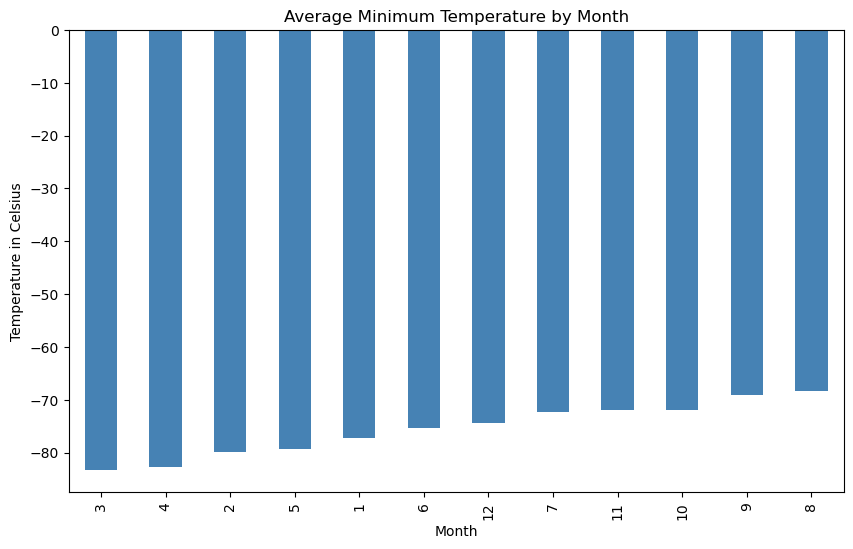

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the data from coldest to hottest
avg_min_temp_sorted = avg_min_temp.sort_values(ascending=True)

# Created a bar chart
plt.figure(figsize=(10, 6))
avg_min_temp_sorted.plot(kind='bar', color='steelblue')

# Add labels and title# Formatted the bar chart to include labels and title
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')


# Displayed the chart
plt.show()

In [17]:
# 4. What is the average pressure by month?
avg_pressure = Mars_Temperature.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

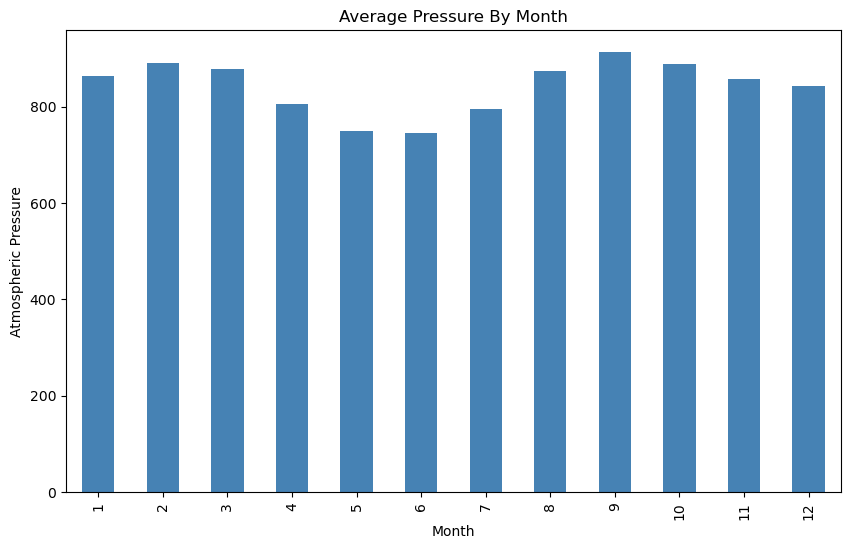

In [18]:
# Plotted the average pressure by month
# Created a bar chart
plt.figure(figsize=(10, 6))
avg_pressure.plot(kind='bar', color='steelblue')

# Formatted the bar chart to include labels and title
plt.title('Average Pressure By Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Displayed the chart
plt.show()

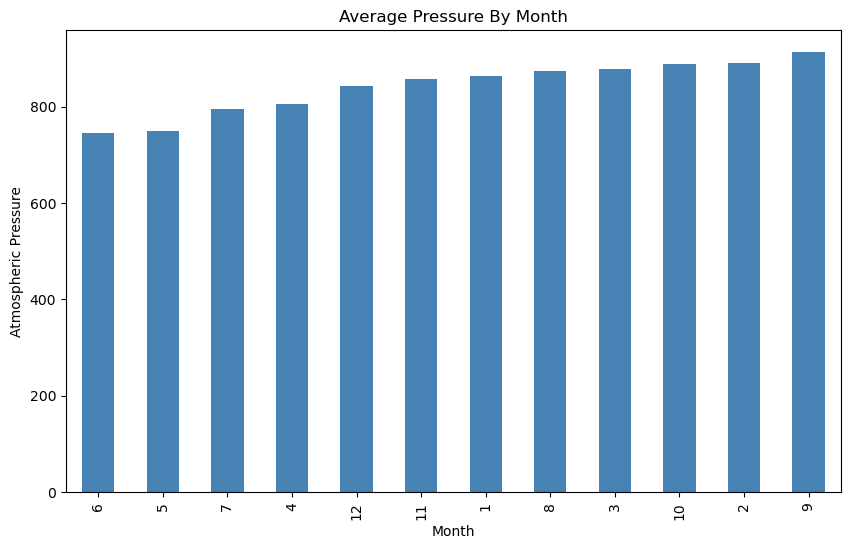

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the data from months with the lowest atmospoheric pressure to highest
avg_pressure_sorted = avg_pressure.sort_values(ascending=True)

# Created a bar chart
plt.figure(figsize=(10, 6))
avg_pressure_sorted.plot(kind='bar', color='steelblue')

# Formatted the bar chart to include labels and title
plt.title('Average Pressure By Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Displayed the chart
plt.show()

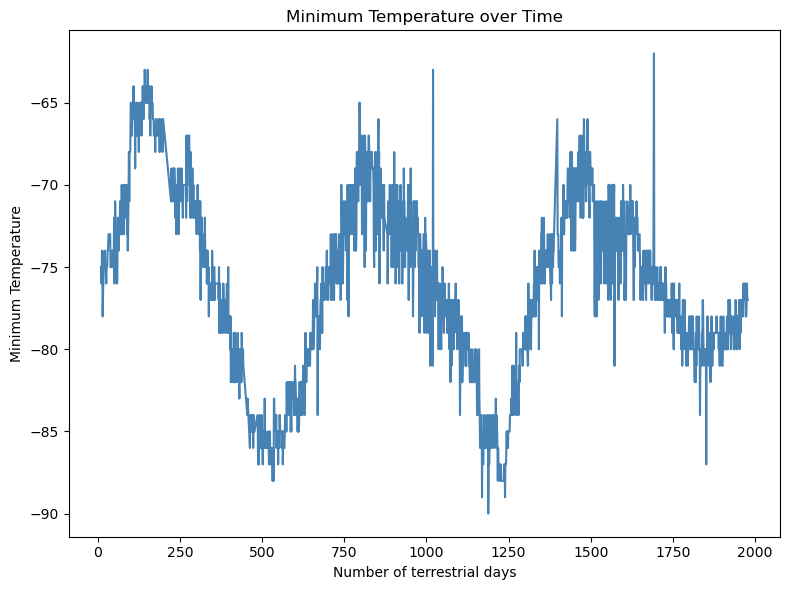

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimated the result by plotting the daily minimum temperature of each observation in the data set.
TOT = pd.DataFrame(Mars_Temperature, columns=['sol', 'min_temp']) # Convert results into a dataframe
TOT.set_index('sol', inplace=True) # Set date as index

# Plotting
TOT.plot(
    kind='line',         # Specifying the type of plot i.e., a line
    figsize=(8, 6),      # Formatting the chart size
    color='steelblue',   # Formatting the plot color
    legend=False         # No Legend   
)

plt.title('Minimum Temperature over Time') # Label for the plot line
plt.xlabel("Number of terrestrial days")  # Label for x-axis
plt.ylabel("Minimum Temperature")  # Label for y-axis

plt.tight_layout()  # Compress layout for better spacing and readability
plt.show() # Display plot line

#### Minimum Temperature

In month 3, the average minimum temperature was -83.307292°C, marking the lowest minimum temperature in a Martian year. In contrast, month 8 had the highest average minimum temperature of the year at -68.382979°C.

#### Atmospheric Pressure

In month 6, the average atmospheric pressure was 745.054422, marking the lowest atmospheric pressure in a Martian year. In contrast, month 9 recorded the highest atmospheric pressure of the year, with an average of 913.305970.

#### Year Length

Upon reviewing the plot of terrestrial days versus minimum temperature, it appears that the pattern repeats and returns to the starting point between 500 and 750 terrestrial days. This happens slightly past two-thirds of the way, which would be around 167.67 terrestrial days (250 x 2/3 = 167.67). Given that the plot reaches the starting point just above this mark, I estimate the number of terrestrial days in a Martian year to be approximately 670.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
#Initialized the file output
file_to_output = os.path.join("Mars_Data.csv") 

# Wrote the data to a CSV
Mars_Temperature.to_csv("Mars_Data.csv")

In [25]:
# Closed the browser
browser.quit()